In [2]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup

# 1. 함수작성

In [3]:
if partymem17.start[0] < df_rho.date[0] < partymem17.end[0]:
    df_rho['d'] = 17
elif partymem18.start[0] < df_rho.date[0] < partymem18.end[0]:
    df_rho['d'] = 18
elif partymem19.start[0] < df_rho.date[0] < partymem19.end[0]:
    df_rho['d'] = 19
elif partymem20.start[0] < df_rho.date[0] < partymem20.end[0]:
    df_rho['d'] = 20
elif partymem21.start[0] < df_rho.date[0] < partymem21.end[0]:
    df_rho['d'] = 21
else:
    df_rho['d'] = '?'# 데이터 불러오기
def read_log(filename):
    with open(filename, encoding = 'utf-8') as f:
        log_list = f.readlines()
    
    log_str = '//'.join(log_list)
    log_str = log_str.replace('\n','')  # 모든 개행 제거
    log_str = re.sub('\<\w+\>','',log_str)  # < > 요소 제거
    
    log_title = re.findall(r'\d+년\d+월\d+일',log_str[:30])[0] # ??년??월??일
    log_title = re.sub('\일','',str(log_title))  # ??년??월??
    log_title = re.sub('[가-힣]+','-',str(log_title))  #??-??-??
        
    log_str = re.sub('\(\d+\w+\d+\w+\)','',log_str)  # (??시??분) 제거
    log_str = log_str[log_str.find('개의)')+3:]  # 개의) 보다 앞 내용 제거
    log_str = log_str[:log_str.find('산회)')-8]  # 산회) 보다 뒷 내용 제거
    
    log_list = re.split('//|  ',log_str)
    log_list = [log for log in log_list if log]
    log_list.insert(0,log_title) # log_list의 맨 앞에 log_title 추가
    
    return log_list

In [4]:
# text 내용 전처리
def log_regex(log_list):
    # 정규식 확인 사이트: https://regexr.com/
    log_date = re.compile('\d+-\d+-\d+')
    log_name = re.compile('◯([\w]+ [\w]+)')
    log_parse_result = []
    date = ''
    name = ''
    
  
    # <>에 둘러싸인 표나 그림 제거
    for log in log_list:
        if len(log_date.findall(log)) > 0:
            date = log_date.findall(log)
        elif len(log_name.findall(log)) > 0:
            # log에서 log_speaker와 일치하는 것을 모두 찾아라
            ## log_list의 각 행에서 log_speaker의 정규식과 일치하는 게 있다면:
            name = log_name.findall(log)
            # 찾은 log_speaker를 speaker에 assign
        else:
            log_parse_result.append([date[0],name[0],log])
    
    log_parse_result = pd.DataFrame(log_parse_result,
                                    columns = ['date','name','contents'])
    # log_parse_result.to_csv('C:/Users/user/python/local/Congress_Meeting_Log/result/result.csv',index = False)
    
    return log_parse_result

# 2. 코드실행 및 df 생성

In [5]:
log_raw1 = read_log('./raw/21_384_5.txt')
log_raw2 = read_log('./raw/21_384_7_0.txt')
log_raw3 = read_log('./raw/21_384_7_1.txt')

log_raw = log_raw1 + log_raw2 + log_raw3

In [6]:
log_raw

['2021-2-5',
 '◯의장 박병석',
 '의석을 정돈해 주시기 바랍니다.',
 '성원이 되었으므로 제5차 본회의를 개의하겠습니다.',
 '보고사항은 회의록에 게재토록 하겠습니다.',
 '(보고사항은 끝에 실음)',
 'o 국무위원(중소벤처기업 권칠승) 인사',
 '◯의장 박병석',
 '의사일정에 들어가기에 앞서서 신임 국무위원의 인사를 듣도록 하겠습니다.',
 '권칠승 중소벤처기업부장관 나오셔서 인사해 주시기 바랍니다.',
 '◯중소벤처기업부장관 권칠승',
 '존경하는 박병석 국회의장님 그리고 의원님 여러분!',
 '중소벤처기업부장관에 임명된 권칠승입니다.',
 '코로나19의 세계적 대유행으로 그 어느 때보다 대내외적으로 여건이 엄중한 시기에 중소벤처기업부장관의 소임을 맡게 되어 무거운 책임감을 느낍니다.',
 '이러한 위기 속에서 소상공인, 자영업자들의 신속한 경영 회복과 안정적 영업환경 조성을 위해 모든 역량을 쏟도록 하겠습니다. 그리고 중소․벤처기업이 주역이 되어 빠르고 강한 경제 회복과 선도형 경제로 힘껏 도약할 수 있도록 모든 정책 역량을 집중해 나가겠습니다. 정책 추진 과정에서는 국민을 대표하는 국회와 긴밀히 협의하겠습니다.',
 '존경하는 국회의장님과 의원님들의 많은 관심과 아낌없는 격려를 부탁드립니다.',
 '감사합니다.',
 '◯의장 박병석',
 '권칠승 중소벤처기업부장관 수고하셨습니다.',
 '1. 경제에 관한 질문',
 '◯의장 박병석',
 '그러면 의사일정 제1항 경제에 관한 질문을 상정합니다.',
 '오늘 질문하실 의원님은 모두 열한 분이십니다.',
 '의원 1인당 질문시간은 답변을 제외하고 10분이며 질문 과정에서 전광판에 영상이 표출되는 시간은 발언시간에 포함된다는 것을 말씀드립니다.',
 '그러면 먼저 경북 군위․의성․청송․영덕 출신의 국민의힘 김희국 의원 나오셔서 질문해 주시기 바랍니다.',
 '◯金熙國 의원',
 '존경하는 국민 여러분!',
 '박병석 의장님과 동료 의원 여러분!',
 '국민의힘 김희국 의원입니다.',
 

In [433]:
df = log_regex(log_raw)
df

,date,name,contents
0,2021-2-5,의장 박병석,의석을 정돈해 주시기 바랍니다.
1,2021-2-5,의장 박병석,성원이 되었으므로 제5차 본회의를 개의하겠습니다.
2,2021-2-5,의장 박병석,보고사항은 회의록에 게재토록 하겠습니다.
3,2021-2-5,의장 박병석,(보고사항은 끝에 실음)
4,2021-2-5,의장 박병석,o 국무위원(중소벤처기업 권칠승) 인사
...,...,...,...
3676,2021-2-26,조정훈 의원,그리고 마지막까지 들어 주신 모든 동료 의원 여러분들께 진심으로 감사를 드립니다.
3677,2021-2-26,조정훈 의원,이상입니다.
3678,2021-2-26,의장 박병석,조정훈 의원 수고하셨습니다.
3679,2021-2-26,의장 박병석,오늘 회의는 이것으로 마치겠습니다.


## 특정 키워드 카운트

In [428]:
(df['contents'].str.count('예비타당성').groupby(df['name'])
 .sum().sort_values(ascending=False)).head()

name
곽상도 의원           10
심상정 의원            4
전재수 의원            2
국토교통위원장대리 李憲昇     2
진성준 의원            2
Name: contents, dtype: int64

# 3. 워드클라우드 작성

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from konlpy.utils import pprint
from konlpy.tag import Okt
from collections import Counter
%matplotlib inline

In [9]:
okt = Okt()
wc = WordCloud(font_path = 'C:/Windows/Fonts/H2HDRM.TTF',
               background_color = 'white',
               width=4000, height=3000)

In [10]:
df_yeta = df.loc[df.contents.str.contains('예비타당성')]
text = ' '.join(df_yeta['contents'])

In [153]:
# df_yeta.to_csv('C:/Users/user/python/local/Congress_Meeting_Log/result/df_yeta.csv',index=False)

In [11]:
noun = okt.nouns(text)
for i,v in enumerate(noun):
    if len(v)<2:
        noun.pop(i)
count = Counter(noun)
noun_list = count.most_common(100)
for v in noun_list:
    print(v)

('타당성조사', 30)
('사업', 30)
('공항', 24)
('예비', 22)
('면제', 15)
('건설', 12)
('추진', 12)
('가덕도', 10)
('예정', 6)
('지역', 6)
('국책', 6)
('제도', 6)
('재정', 6)
('법안', 4)
('의원', 4)
('법률', 4)
('절차', 4)
('주변', 4)
('시행', 4)
('효율', 4)
('최대', 4)
('소요', 4)
('합의', 4)
('무력', 4)
('정부', 4)
('부작용', 4)
('예산', 4)
('입지', 4)
('결정', 4)
('대통령', 4)
('특별법', 4)
('대한', 3)
('다음', 2)
('특별', 2)
('대안', 2)
('박수영', 2)
('한정애', 2)
('각각', 2)
('대표', 2)
('발의', 2)
('건의', 2)
('제정', 2)
('통합', 2)
('조정', 2)
('주요', 2)
('내용', 2)
('규정', 2)
('범위', 2)
('개발', 2)
('지정', 2)
('공사', 2)
('물품', 2)
('용역', 2)
('계약', 2)
('체결', 2)
('관할', 2)
('인근', 2)
('지방자치단체', 2)
('영업소', 2)
('우대', 2)
('국토교통부', 2)
('건립', 2)
('추진단', 2)
('도록', 2)
('것', 2)
('추정', 2)
('초대형', 2)
('특례조항', 2)
('포함', 2)
('소관', 2)
('상임', 2)
('위인', 2)
('국토', 2)
('교통', 2)
('위원회', 2)
('심사', 2)
('소위', 2)
('논의', 2)
('당시', 2)
('당초', 2)
('여야', 2)
('최대한', 2)
('단축', 2)
('처리', 2)
('결론', 2)
('사안', 2)
('로', 2)
('의결', 2)
('기존', 2)
('손바닥', 2)
('번복', 2)
('조항', 2)
('문재인', 2)
('여당', 2)
('매우', 2)
('알', 2)
('반증', 2)


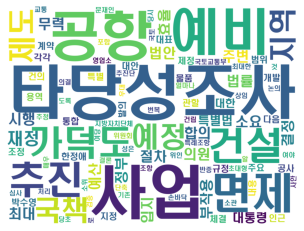

<Figure size 432x288 with 0 Axes>

In [150]:
plt.imshow(wc.generate_from_frequencies(dict(noun_list)))
plt.axis('off')
plt.show()

# 소속당 추가

In [330]:
partymem17 = pd.read_csv('C:/Users/user/python/local/Congress_Meeting_Log/data/patymem17.csv')
temp = partymem17
temp.head()

,party,name,start,end
0,통합민주당 (前 열린우리당 & 대통합민주신당),강기정,2004-05-30,2008-05-29
1,통합민주당 (前 열린우리당 & 대통합민주신당),강봉균,2004-05-30,2008-05-29
2,통합민주당 (前 열린우리당 & 대통합민주신당),강성종,2004-05-30,2008-05-29
3,통합민주당 (前 열린우리당 & 대통합민주신당),강창일,2004-05-30,2008-05-29
4,통합민주당 (前 열린우리당 & 대통합민주신당),강혜숙,2004-05-30,2008-05-29


In [429]:
df2 = df
df2.head()

,date,name,contents
0,2021-2-5,의장 박병석,의석을 정돈해 주시기 바랍니다.
1,2021-2-5,의장 박병석,성원이 되었으므로 제5차 본회의를 개의하겠습니다.
2,2021-2-5,의장 박병석,보고사항은 회의록에 게재토록 하겠습니다.
3,2021-2-5,의장 박병석,(보고사항은 끝에 실음)
4,2021-2-5,의장 박병석,o 국무위원(중소벤처기업 권칠승) 인사


In [430]:
for i in range(len(df2)):
    for name in temp.name:
        if name in df2.name[i]:
            df2.name[i] = name

In [431]:
pd.merge(df2,temp,how='left',on='name')

,date,name,contents,party,start,end
0,2021-2-5,박병석,의석을 정돈해 주시기 바랍니다.,통합민주당 (前 열린우리당 & 대통합민주신당),2004-05-30,2008-05-29
1,2021-2-5,박병석,성원이 되었으므로 제5차 본회의를 개의하겠습니다.,통합민주당 (前 열린우리당 & 대통합민주신당),2004-05-30,2008-05-29
2,2021-2-5,박병석,보고사항은 회의록에 게재토록 하겠습니다.,통합민주당 (前 열린우리당 & 대통합민주신당),2004-05-30,2008-05-29
3,2021-2-5,박병석,(보고사항은 끝에 실음),통합민주당 (前 열린우리당 & 대통합민주신당),2004-05-30,2008-05-29
4,2021-2-5,박병석,o 국무위원(중소벤처기업 권칠승) 인사,통합민주당 (前 열린우리당 & 대통합민주신당),2004-05-30,2008-05-29
...,...,...,...,...,...,...
3676,2021-2-26,조정훈 의원,그리고 마지막까지 들어 주신 모든 동료 의원 여러분들께 진심으로 감사를 드립니다.,NaN,NaN,NaN
3677,2021-2-26,조정훈 의원,이상입니다.,NaN,NaN,NaN
3678,2021-2-26,박병석,조정훈 의원 수고하셨습니다.,통합민주당 (前 열린우리당 & 대통합민주신당),2004-05-30,2008-05-29
3679,2021-2-26,박병석,오늘 회의는 이것으로 마치겠습니다.,통합민주당 (前 열린우리당 & 대통합민주신당),2004-05-30,2008-05-29
